# Preprocessing

1. There are 2 different types of loans:
    + Cash Loans
    + Revolving Loans
2. Occupation type
    + ~20 different occupation types
3. AMT_ANNUITY
    + log transformation
4. Amount income total
    + Remove outliers 
5. AMT_CREDIT
    + log transformation
6. NAME_EDUCATION_TYPE
    + ~5 education types
7. DAYS_EMPLOYED
    + Remove top outliers
    + Multiply by negative 1 to make positive
    + Bucket
        + < 6 months
        + 6 months - 1 year
        + 1 - 5 years
        + 5 - 10 years
        + 10 - 20 years
        + > 20 years
8. EXT_SOURCE_2
    + Missing less than 1% of the records
    + Already normalized
9. FLAG_OWN_CAR
    + Treat this like a flag if not null
10. REGION_RATING
    + One hot encoding
11. REGION_RATING_W_CITY
    + One hot encoding
12. CNT_FAM_MEMBERS
    + Recode to 1, 2, 3 and >=4
13. OBS_30_CNT_SOCIAL_CIRCLE
    + Recode to 0 or >=1
14. DEF_30_CNT_SOCIAL_CIRCLE
    + Recode to 0 or >=1 
15. OBS_60_CNT_SOCIAL_CIRCLE
    + Recode to - of >= 1
16. DEF_60_CNT_SOCIAL_CIRCLE
    + Recode to 0 or >= 1
17. AMT_REQ_CREDIT_BUREAU_YEAR
    + Recode to 0, 1, 2 or >= 3
18. NAME_INCOME_TYPE
    + One Hot Encoding
19. NAME_FAMILY_STATUS
    + One hot encoding
20. NAME_HOUSING_TYPE
    + One hot encoding
21. REGION_POPULATION_RELATIVE
    + right skewed
22. FLAG_OWN_REALTY


In [2]:
import pandas as pd
import numpy as np


In [5]:
df = pd.read_csv('../home-credit-default-risk/application_train.csv')
df.shape

(307511, 122)

In [98]:
column_set = ['SK_ID_CURR',
'TARGET',
'NAME_CONTRACT_TYPE',
'OCCUPATION_TYPE',
'AMT_ANNUITY',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'NAME_EDUCATION_TYPE',
'DAYS_EMPLOYED',
'EXT_SOURCE_2',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY',
'CNT_FAM_MEMBERS',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'NAME_INCOME_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'REGION_POPULATION_RELATIVE'
]

num_features = ['AMT_ANNUITY',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'EXT_SOURCE_2',
'REGION_POPULATION_RELATIVE']

cat_features = ['OCCUPATION_TYPE',
'NAME_EDUCATION_TYPE',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY',
'CNT_FAM_MEMBERS_BKT',
'DAYS_EMPLOYED_BKT',
'OBS_30_CNT_SOCIAL_CIRCLE_BKT',
'DEF_30_CNT_SOCIAL_CIRCLE_BKT',
'OBS_60_CNT_SOCIAL_CIRCLE_BKT',
'DEF_60_CNT_SOCIAL_CIRCLE_BKT',
'AMT_REQ_CREDIT_BUREAU_YEAR_bkt',
'NAME_INCOME_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE'
]

pass_features = ['EXT_SOURCE_2','REGION_POPULATION_RELATIVE']

In [100]:
# TO DO
# create the _BKT features and add to the dataframe
# make a transformation pipeline
# numeric features get standardized
# categorical features get one hot encoding
# pass through features get passed throughs
# train a logistic regression model using the dataset
# save the transformed dataset to the data directory

,EXT_SOURCE_2,REGION_POPULATION_RELATIVE
0,0.262949,0.018801
1,0.622246,0.003541
2,0.555912,0.010032
3,0.650442,0.008019
4,0.322738,0.028663
...,...,...
307506,0.681632,0.032561
307507,0.115992,0.025164
307508,0.535722,0.005002
307509,0.514163,0.005313


In [83]:
#df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()
# Define new bins and labels
bins = [0, 1, 2, 3, float('inf')]
labels = [
    '0',
    '1',
    '2',
    '3',
]

# Create employment bucket column
df['OBS_BUCKET'] = pd.cut(df['AMT_REQ_CREDIT_BUREAU_YEAR'], bins=bins, labels=labels, right=False)
# Count TARGET values per bucket
bucket_counts = df.groupby(['OBS_BUCKET', 'TARGET']).size().unstack(fill_value=0)
bucket_counts['TOTAL'] = bucket_counts.sum(axis=1)
bucket_counts['TARGET_1_RATE'] = bucket_counts[1] / bucket_counts['TOTAL']

bucket_counts['TARGET_1_RATE_PCT'] = (bucket_counts['TARGET_1_RATE'] * 100).round(2)

bucket_counts

/var/folders/dk/w25w7v256r15pk9pvk88_y780000gn/T/ipykernel_81088/4023069895.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_counts = df.groupby(['OBS_BUCKET', 'TARGET']).size().unstack(fill_value=0)


TARGET,0,1,TOTAL,TARGET_1_RATE,TARGET_1_RATE_PCT
OBS_BUCKET,,,,,
0,66678,5123,71801,0.071350,7.13
1,58755,4650,63405,0.073338,7.33
2,46124,4068,50192,0.081049,8.10
3,73902,6692,80594,0.083033,8.30


In [43]:
#df['EXT_SOURCE_1'].isna().sum()/len(df)
df['EXT_SOURCE_2'].isna().sum()/len(df)
#df['EXT_SOURCE_3'].isna().sum()/len(df)

np.float64(0.0021462646864665006)

In [29]:
df['OWN_CAR_AGE'].notna().sum() 
df['OWN_CAR_AGE'].isna().sum()

np.int64(202929)

In [54]:
import pandas as pd

# Convert DAYS_EMPLOYED to absolute years
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs() / 365

# Define new bins and labels
bins = [0, 0.5, 1, 2, 5, 10, 20, 30, float('inf')]
labels = [
    '< 0.5 years',
    '0.5 - 1 year',
    '1 - 2 years',
    '2 - 5 years',
    '5 - 10 years',
    '10 - 20 years',
    '20 - 30 years',
    '> 30 years'
]

# Create employment bucket column
df['EMPLOYMENT_BUCKET'] = pd.cut(df['YEARS_EMPLOYED'], bins=bins, labels=labels, right=False)

# Count TARGET values per bucket
bucket_counts = df.groupby(['EMPLOYMENT_BUCKET', 'TARGET']).size().unstack(fill_value=0)

# Add total column
bucket_counts['TOTAL'] = bucket_counts.sum(axis=1)

# Calculate TARGET = 1 rate
bucket_counts['TARGET_1_RATE'] = bucket_counts[1] / bucket_counts['TOTAL']

# Optional: format as percentage
bucket_counts['TARGET_1_RATE_PCT'] = (bucket_counts['TARGET_1_RATE'] * 100).round(2)

print(bucket_counts)


TARGET                 0     1  TOTAL  TARGET_1_RATE  TARGET_1_RATE_PCT
EMPLOYMENT_BUCKET                                                      
< 0.5 years         8718  1034   9752       0.106030              10.60
0.5 - 1 year       16121  2031  18152       0.111888              11.19
1 - 2 years        28210  3631  31841       0.114035              11.40
2 - 5 years        68813  7709  76522       0.100742              10.07
5 - 10 years       60105  4785  64890       0.073740               7.37
10 - 20 years      36303  2119  38422       0.055151               5.52
20 - 30 years       9123   429   9552       0.044912               4.49
> 30 years         55293  3087  58380       0.052878               5.29


/var/folders/dk/w25w7v256r15pk9pvk88_y780000gn/T/ipykernel_30112/3670023734.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_counts = df.groupby(['EMPLOYMENT_BUCKET', 'TARGET']).size().unstack(fill_value=0)


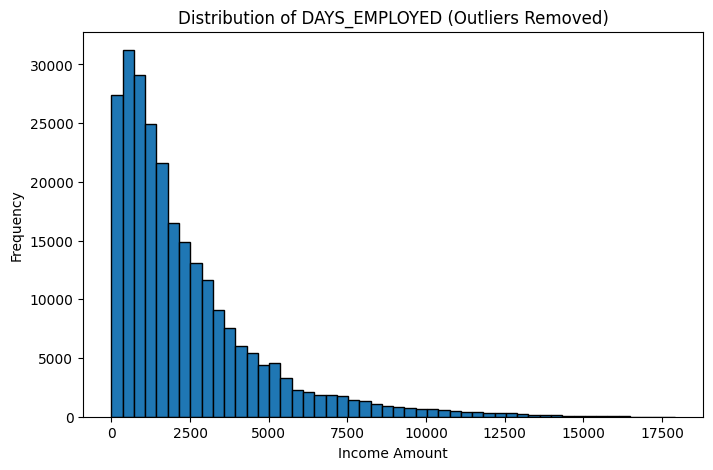

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate IQR
Q1 = df['DAYS_EMPLOYED'].quantile(0.25)
Q3 = df['DAYS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['DAYS_EMPLOYED'] <= upper_bound)]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist((df_filtered['DAYS_EMPLOYED'])*-1, bins=50, edgecolor='black')

plt.title('Distribution of DAYS_EMPLOYED (Outliers Removed)')
plt.xlabel('Income Amount')
plt.ylabel('Frequency')

plt.show()


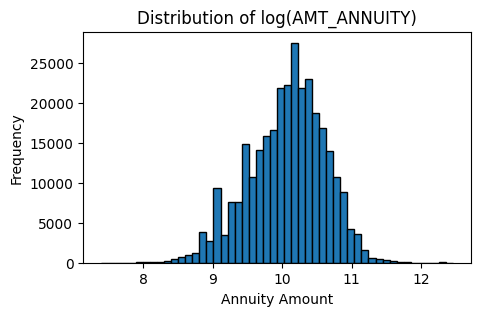

In [42]:
import matplotlib.pyplot as plt
import pandas as pd


# Plot histogram
plt.figure(figsize=(5, 3))
plt.hist(np.log(df['AMT_ANNUITY']), bins=50, edgecolor='black')

plt.title('Distribution of log(AMT_ANNUITY)')
plt.xlabel('Annuity Amount')
plt.ylabel('Frequency')

plt.show()


In [37]:
df['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Plot histogram
plt.figure(figsize=(5, 3))
plt.hist(np.log(df['AMT_ANNUITY']), bins=50, edgecolor='black')

plt.title('Distribution of log(AMT_ANNUITY)')
plt.xlabel('Annuity Amount')
plt.ylabel('Frequency')

plt.show()


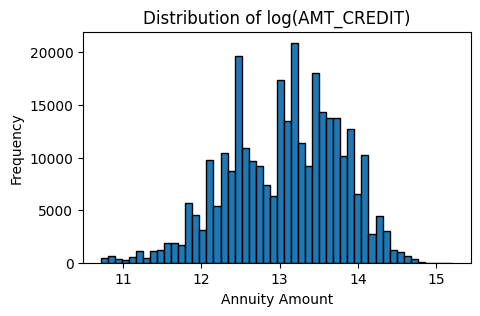

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot histogram
plt.figure(figsize=(5, 3))
plt.hist(np.log(df['AMT_CREDIT']), bins=50, edgecolor='black')

plt.title('Distribution of log(AMT_CREDIT)')
plt.xlabel('Annuity Amount')
plt.ylabel('Frequency')

plt.show()


In [34]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

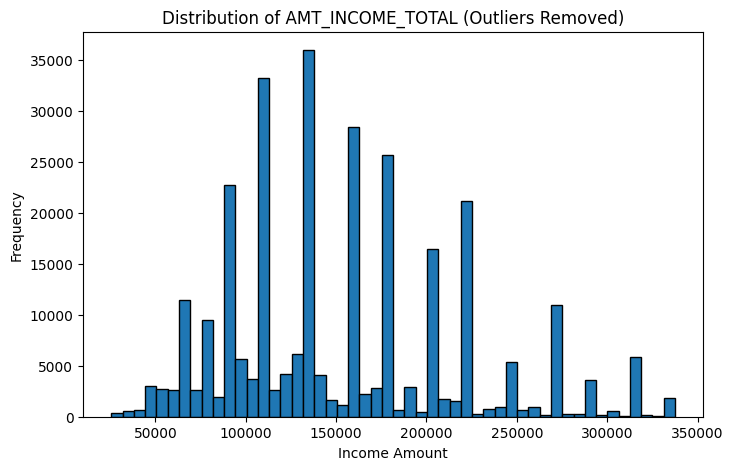

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate IQR
Q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['AMT_INCOME_TOTAL'] >= lower_bound) & (df['AMT_INCOME_TOTAL'] <= upper_bound)]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df_filtered['AMT_INCOME_TOTAL'], bins=50, edgecolor='black')

plt.title('Distribution of AMT_INCOME_TOTAL (Outliers Removed)')
plt.xlabel('Income Amount')
plt.ylabel('Frequency')

plt.show()


In [17]:
sums= df[['NAME_CONTRACT_TYPE','TARGET']].value_counts().reset_index().groupby("TARGET")["count"].transform("sum")

_df = df[['NAME_CONTRACT_TYPE','TARGET']].value_counts().reset_index()

_df['ratio_within_target'] = _df['count']/sums
# Compute total count per TARGET
#totals = df.groupby("TARGET")["count"].transform("sum")
_df
# Compute ratio within each TARGET group
#df["ratio_within_target"] = df["count"] / totals


,NAME_CONTRACT_TYPE,TARGET,count,ratio_within_target
0,Cash loans,0,255011,0.902100
1,Revolving loans,0,27675,0.097900
2,Cash loans,1,23221,0.935388
3,Revolving loans,1,1604,0.064612


In [19]:
sums= df[['NAME_CONTRACT_TYPE','TARGET']].value_counts().reset_index().groupby("NAME_CONTRACT_TYPE")["count"].transform("sum")

_df = df[['NAME_CONTRACT_TYPE','TARGET']].value_counts().reset_index()

_df['ratio_within_contract'] = _df['count']/sums
# Compute total count per TARGET
#totals = df.groupby("TARGET")["count"].transform("sum")
_df.sort_values('NAME_CONTRACT_TYPE')
# Compute ratio within each TARGET group
#df["ratio_within_target"] = df["count"] / totals


,NAME_CONTRACT_TYPE,TARGET,count,ratio_within_contract
0,Cash loans,0,255011,0.916541
2,Cash loans,1,23221,0.083459
1,Revolving loans,0,27675,0.945217
3,Revolving loans,1,1604,0.054783
